In [1]:
#modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Data
df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#No Of Data Entries and Features
df.shape

(145460, 23)

In [4]:
#Info Abt Dataset
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
# Drop columns with more than 40% missing values
threshold = len(df) * 0.4
df = df.dropna(thresh=threshold, axis=1)

In [6]:
#Replacing Missing Numerical Values With Median value
num_cols = df.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    
#Replacing Missing Categorical Values With Mode
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()) 
    

In [7]:
print("Shape before cleaning:", df.shape)
print(df['RainTomorrow'].value_counts(dropna=False))
print(df['RainTomorrow'].unique())

Shape before cleaning: (145460, 23)
RainTomorrow
No     110316
Yes     31877
NaN      3267
Name: count, dtype: int64
['No' 'Yes' nan]


In [8]:
#Converting Target & Important Columns
df['RainToday'] = df['RainToday'].map({'Yes':1, 'No':0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1, 'No':0})

In [9]:
#Converting single Date Column to Day,Month ,time so model can understand
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace=True)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [10]:
#Encoding Remaining Categorical Data
df = pd.get_dummies(df, drop_first=True)

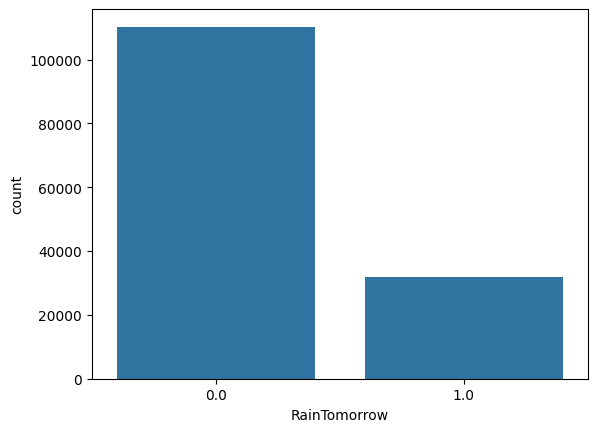

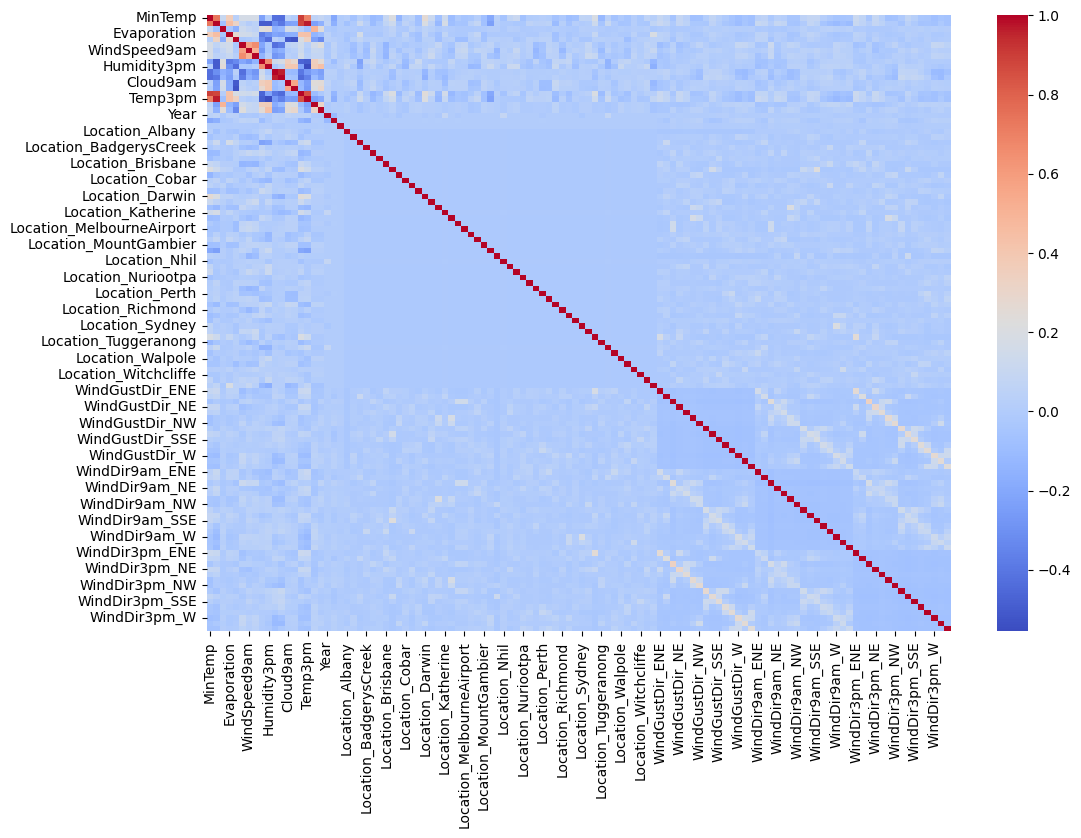

In [11]:
#Exploratory Data Analysis EDA
#Target Distribution
sns.countplot(x='RainTomorrow', data=df)
plt.show()
#Corr Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [12]:
# Drop original missing targets
df = df.dropna(subset=['RainTomorrow'])

#Separate X and y
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

#Fill feature missing values
X = X.fillna(X.median())

print("Final shape:", df.shape)
print("Target distribution:")
print(y.value_counts())

Final shape: (142193, 114)
Target distribution:
RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64


In [13]:
#Train-Test-Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X missing:", X.isnull().sum().sum())
print("y missing:", y.isnull().sum())


X missing: 0
y missing: 0


In [15]:
#Random Forest Model Initialization
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
#Make Model Make Some Predictions
y_pred = rf.predict(X_test)

In [17]:
#Test Model Prediction's Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8546714019480292


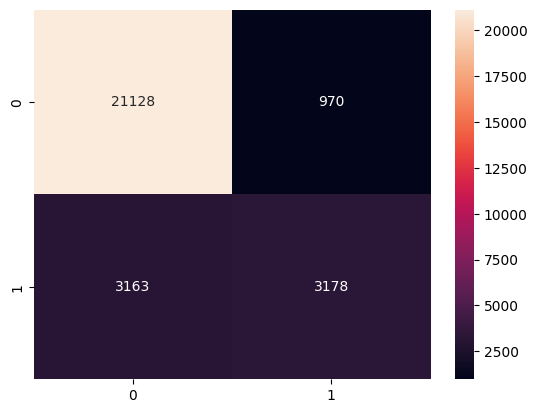

In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [19]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     22098
         1.0       0.77      0.50      0.61      6341

    accuracy                           0.85     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.85      0.84     28439



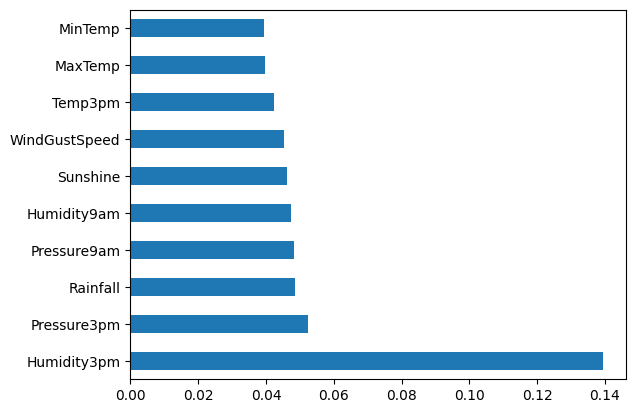

In [20]:
#feature Importance
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
import pickle

pickle.dump(rf, open('rainfall_model.pkl', 'wb'))